# Identifying potential COVID-19 positive patients and their characteristics

# Task 1: Preparation of data

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
covid = './covid_hospitalization_sample.csv'
df = pd.read_csv(covid, encoding = 'ISO-8859-1')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward,Patient addmited to semi-intensive unit,Patient addmited to intensive care unit,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation_arterial blood gases,pCO2_arterial blood gas analysis,Base excess_arterial blood gas analysis,pH_arterial blood gas analysis,Total CO2_arterial blood gas analysis,HCO3_arterial blood gas analysis,pO2_arterial blood gas analysis,Arteiral Fio2,Phosphor,ctO2_arterial blood gas analysis
0,9abc76405794c6d,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01d324f278f3101,16,negative,0,0,0,0.671398,0.290940,0.135801,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,b2fb9312efbadc1,9,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,eb5ef46a892698f,0,negative,0,0,0,-0.152590,-0.460932,1.065375,-0.438097,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,a713345aef928fa,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1. What is the proportion of patients who are classified as COVID-19 positive? Would you require a sampling technique on this data?

45% of patients are diagnosed as COVID-19 positive. Sampling techniques such as cross validation is required in order to avoid distrubution bias of data between training and test datasets.

In [3]:
positive_rate = df['SARS-Cov-2 exam result'][df['SARS-Cov-2 exam result']=='positive'].count()/df.shape[0]

In [4]:
positive_rate

0.45365853658536587

## 3. What variables did you include in the analysis? justify the choice of input selection (input/target). 

Target : SARS-Cov-2 exam result <br>
Input: 'Patient age quantile' and variables related to blood test and influenza rapid test <br>
Justification: The purpose of this analysis is to see the impact that those input variables have to COVID-19 exam results. Therefore, the above variables are selected.<br>
Patient ID is excluded because it is an identifier.<br>
The following variables are also excluded because they tell the severity of patients who are COVID-19 positive, which is out of the topic.<br>
'Patient addmited to regular ward', 'Patient addmited to semi-intensive unit' and 'Patient addmited to intensive care unit'<br>

### Selecting variables

In [5]:
basic = ['Patient ID', 'Patient age quantile', 'SARS-Cov-2 exam result', 'Patient addmited to regular ward', 'Patient addmited to semi-intensive unit', 'Patient addmited to intensive care unit'] 
blood_test = ['Proteina C reativa', 'Neutrophils', 'Mean platelet volume',
'Monocytes', 'Red blood cell distribution width', 'Red blood Cells', 'Platelets',
'Eosinophils', 'Basophils', 'Leukocytes', 'Mean corpuscular hemoglobin', 'Mean corpuscular volume', 'Mean corpuscular hemoglobin concentration','Lymphocytes', 'Hemoglobin', 'Hematocrit']
influenza_test = ['Influenza B rapid test', 'Influenza A rapid test']

column_list = basic + blood_test + influenza_test

In [6]:
df2 = df[column_list]

In [7]:
#drop unnecessary columns
df2 = df2.drop(columns=['Patient ID','Patient addmited to regular ward','Patient addmited to semi-intensive unit','Patient addmited to intensive care unit'])

In [8]:
df2.head()

,Patient age quantile,SARS-Cov-2 exam result,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test
0,9,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative
1,16,negative,-0.316791,-0.356851,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,0.086074,-1.249524,0.173372,0.290940,0.671398,positive,negative
2,9,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative
3,0,negative,-0.342622,NaN,-0.438097,-1.270772,0.613318,0.472242,1.065375,-0.835508,-1.140144,-0.080696,-1.651331,-1.255906,-1.249524,3.764100,-0.460932,-0.152590,positive,negative
4,10,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,positive,negative


## 2. Did you have to fix any data quality problems? Detail them.

After selection of input and target variables, it is found that most variables have more than 80% of missing values.
In fact, there are only 64 datasets that are complete.
To solve this problem, three models are created using different methods of data cleansing.
These models are compared in Task 2 using decision tree to discover the best one. 

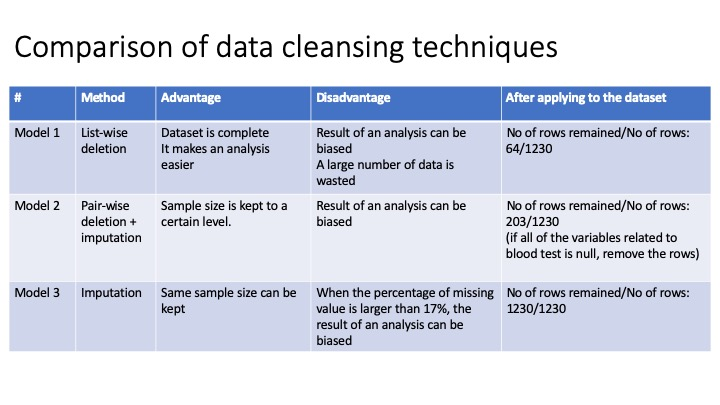

In [9]:
#check the number of non-null values in each column
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient age quantile                       1230 non-null   int64  
 1   SARS-Cov-2 exam result                     1230 non-null   object 
 2   Proteina C reativa                         175 non-null    float64
 3   Neutrophils                                179 non-null    float64
 4   Mean platelet volume                       200 non-null    float64
 5   Monocytes                                  202 non-null    float64
 6   Red blood cell distribution width          202 non-null    float64
 7   Red blood Cells                            202 non-null    float64
 8   Platelets                                  202 non-null    float64
 9   Eosinophils                                202 non-null    float64
 10  Basophils               

In [10]:
#number of rows which do not have null values
print(df2[df2.isnull().any(axis=1)==False].count())

Patient age quantile                         64
SARS-Cov-2 exam result                       64
Proteina C reativa                           64
Neutrophils                                  64
Mean platelet volume                         64
Monocytes                                    64
Red blood cell distribution width            64
Red blood Cells                              64
Platelets                                    64
Eosinophils                                  64
Basophils                                    64
Leukocytes                                   64
Mean corpuscular hemoglobin                  64
Mean corpuscular volume                      64
Mean corpuscular hemoglobin concentration    64
Lymphocytes                                  64
Hemoglobin                                   64
Hematocrit                                   64
Influenza B rapid test                       64
Influenza A rapid test                       64
dtype: int64


In [11]:
#percentage of null values in each column
df2.isnull().sum() / df2.shape[0] * 100.00

Patient age quantile                          0.000000
SARS-Cov-2 exam result                        0.000000
Proteina C reativa                           85.772358
Neutrophils                                  85.447154
Mean platelet volume                         83.739837
Monocytes                                    83.577236
Red blood cell distribution width            83.577236
Red blood Cells                              83.577236
Platelets                                    83.577236
Eosinophils                                  83.577236
Basophils                                    83.577236
Leukocytes                                   83.577236
Mean corpuscular hemoglobin                  83.577236
Mean corpuscular volume                      83.577236
Mean corpuscular hemoglobin concentration    83.577236
Lymphocytes                                  83.577236
Hemoglobin                                   83.577236
Hematocrit                                   83.577236
Influenza 

 ### Formatting categorical variables

In [12]:
exam_result_map = {'negative':0, 'positive': 1}
df2['SARS-Cov-2 exam result'] = df2['SARS-Cov-2 exam result'].map(exam_result_map)

In [13]:
influenza_b_map = {'negative':0, 'positive': 1}
df2['Influenza B rapid test'] = df2['Influenza B rapid test'].map(influenza_b_map)

In [14]:
influenza_a_map = {'negative':0, 'positive': 1}
df2['Influenza A rapid test'] = df2['Influenza A rapid test'].map(influenza_a_map)

### Model construction for three data cleansing methods

### 1st model (List-wise deletion)

In [15]:
df_small = df2.dropna()
df_small

,Patient age quantile,SARS-Cov-2 exam result,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test
1,16,0,-0.316791,-0.356851,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,0.086074,-1.249524,0.173372,0.290940,0.671398,1.0,0.0
5,3,0,-0.396271,0.806817,2.030154,0.672705,-0.978899,-1.907856,-1.534920,-0.835508,-0.529226,-0.960059,1.484965,1.808615,-0.253742,-0.790410,-1.338116,-1.365685,1.0,0.0
18,5,0,0.293222,2.085213,-0.774677,-0.798034,-0.713529,0.190156,-0.492289,-0.329835,0.081693,-0.158615,0.230447,0.106103,0.244149,-1.762721,0.353596,0.305181,1.0,0.0
25,10,0,-0.376401,-0.709230,0.459449,2.826288,-0.801985,0.824849,-0.881705,-0.582671,-0.223767,-1.232772,-0.187727,-0.394636,0.443306,0.028378,0.792188,0.717175,1.0,0.0
28,9,0,-0.231349,-1.069803,1.020415,0.016125,-0.182790,1.882671,-0.818896,-0.540532,0.387152,-1.065805,-1.024072,-1.155758,0.044991,1.290677,1.293436,1.380944,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,17,0,-0.521453,-0.627281,0.347255,0.331284,0.613318,0.278308,-0.730964,1.313601,0.387152,-0.439676,0.178175,-0.154280,0.642463,0.352482,0.416252,0.259404,0.0,0.0
1098,7,0,-0.434025,-0.897711,-1.447836,-0.509139,0.259492,-0.726622,0.638273,6.918138,-0.223767,-0.261578,-1.024072,-0.574902,-1.149948,-0.210435,-1.275460,-1.068133,0.0,0.0
1109,12,0,-0.163791,0.536387,-1.560029,1.276759,-0.536617,0.031483,0.286543,-0.793368,0.081693,-0.075131,-0.605899,-0.574902,-0.154166,-0.730707,-0.272964,-0.244145,0.0,1.0
1164,0,0,0.146183,0.864181,-0.438097,1.828286,0.171035,-0.303494,-0.052626,-0.793368,-0.529226,2.014746,-1.337702,-1.936911,0.941197,-1.233920,-1.024836,-1.319907,0.0,0.0


In [16]:
#positive rate
df_small['SARS-Cov-2 exam result'][df_small['SARS-Cov-2 exam result']==1].sum()/df_small.shape[0]

0.28125

### 2nd model (Pair-wise deletion + imputation)

According to the following heatmap,  it can be seen that variables related to blood test result are correlated to each other, which means that if one variable exist in a row, others are likely to exist.<br>
However, there is no correlation between blood test resut and influenza rapid test.<br>
With the result, it is decided to perform the following pair-wise deletion to the dataset.
If all of the values related to blood test result are null, the row is deleted. This is because if one value is null in blood test results, other values related to blood test result are likely to be null as well. After the deletion, 203 rows remained with maximum percentage of missing values to be 54% (influenza rapid tests). The missing values are imputed with average value of each column. However, for influenza tests, most frequently appeared values are used because they are categorical values.

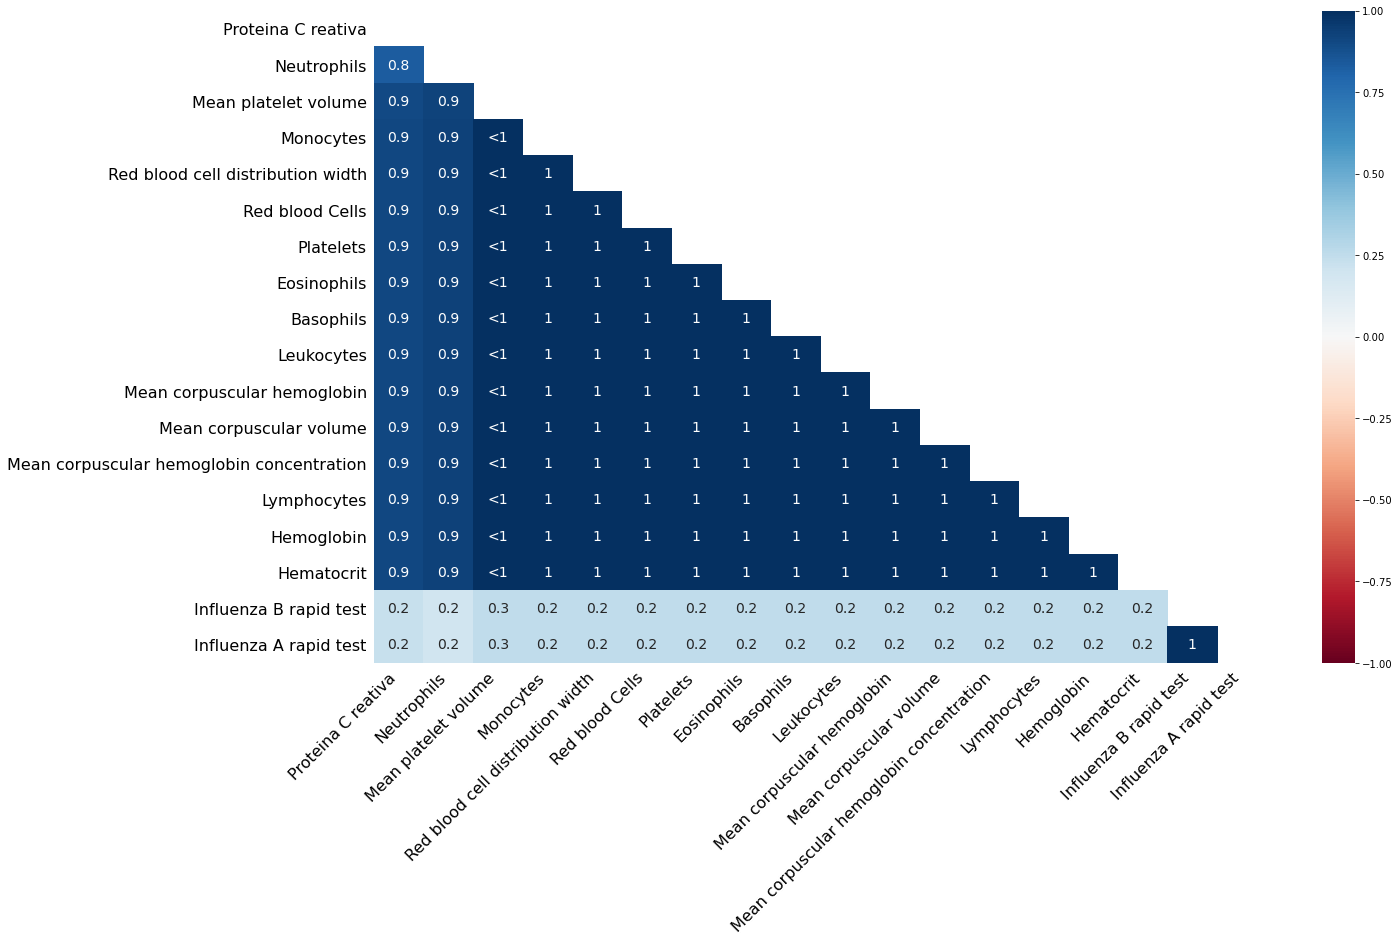

In [17]:
import missingno as msno
msno.heatmap(df2)

In [18]:
#drop rows where columns related to blood test are all null.
df_small2 = df2.dropna(axis=0, how='all', subset=blood_test)

In [19]:
df_small2

,Patient age quantile,SARS-Cov-2 exam result,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test
1,16,0,-0.316791,-0.356851,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,0.086074,-1.249524,0.173372,0.290940,0.671398,1.0,0.0
3,0,0,-0.342622,NaN,-0.438097,-1.270772,0.613318,0.472242,1.065375,-0.835508,-1.140144,-0.080696,-1.651331,-1.255906,-1.249524,3.764100,-0.460932,-0.152590,1.0,0.0
5,3,0,-0.396271,0.806817,2.030154,0.672705,-0.978899,-1.907856,-1.534920,-0.835508,-0.529226,-0.960059,1.484965,1.808615,-0.253742,-0.790410,-1.338116,-1.365685,1.0,0.0
16,10,0,-0.519466,NaN,-0.325903,1.092916,-0.448160,-1.026338,-0.278739,-0.835508,-1.140144,-0.614992,0.700891,0.807138,-0.054585,0.523063,-0.711556,-0.747693,1.0,0.0
18,5,0,0.293222,2.085213,-0.774677,-0.798034,-0.713529,0.190156,-0.492289,-0.329835,0.081693,-0.158615,0.230447,0.106103,0.244149,-1.762721,0.353596,0.305181,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,9,0,-0.521453,-1.307453,-0.550290,0.672705,-0.536617,-0.127191,1.404544,0.302256,0.081693,-0.659517,-0.396813,-0.715108,0.542882,1.162741,-0.335620,-0.495919,NaN,NaN
1216,9,0,-0.328713,0.601946,-0.101517,1.197969,-0.536617,-1.396576,0.022745,-0.540532,0.081693,0.114099,-0.187727,0.126132,-0.652057,-0.824526,-1.526084,-1.480128,0.0,0.0
1221,6,0,-0.521453,NaN,-0.550290,-1.008140,-0.713529,0.013852,0.537779,-0.835508,-1.140144,0.122447,0.544077,0.186222,0.841616,-1.779779,0.353596,0.144961,0.0,0.0
1223,10,0,-0.493635,-1.872898,-0.999063,-0.404086,-0.978899,-0.850035,0.738768,3.504848,3.136283,-0.653951,1.171335,1.788586,-0.851210,1.367438,-0.272964,-0.061036,NaN,NaN


In [20]:
#check the percentage of null values in each column
df_small2.isnull().sum() / df_small2.shape[0] * 100.00

Patient age quantile                          0.000000
SARS-Cov-2 exam result                        0.000000
Proteina C reativa                           13.793103
Neutrophils                                  11.822660
Mean platelet volume                          1.477833
Monocytes                                     0.492611
Red blood cell distribution width             0.492611
Red blood Cells                               0.492611
Platelets                                     0.492611
Eosinophils                                   0.492611
Basophils                                     0.492611
Leukocytes                                    0.492611
Mean corpuscular hemoglobin                   0.492611
Mean corpuscular volume                       0.492611
Mean corpuscular hemoglobin concentration     0.492611
Lymphocytes                                   0.492611
Hemoglobin                                    0.492611
Hematocrit                                    0.492611
Influenza 

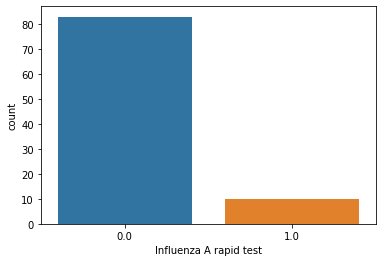

In [21]:
#check the most frequest value in influenza test
sns.countplot(x="Influenza A rapid test",data=df_small2)

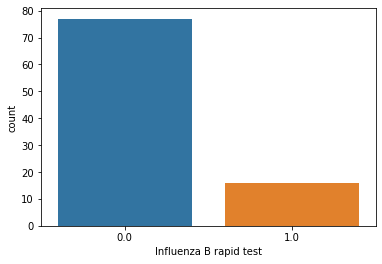

In [22]:
#check the most frequest value in influenza test
sns.countplot(x="Influenza B rapid test",data=df_small2)

In [23]:
# imputation of missing values with mean values
df_small2['Proteina C reativa'].fillna(df_small2['Proteina C reativa'].mean(), inplace=True)
df_small2['Neutrophils'].fillna(df_small2['Neutrophils'].mean(), inplace=True)
df_small2['Mean platelet volume'].fillna(df_small2['Mean platelet volume'].mean(), inplace=True)
df_small2['Monocytes'].fillna(df_small2['Monocytes'].mean(), inplace=True)
df_small2['Red blood cell distribution width'].fillna(df_small2['Red blood cell distribution width'].mean(), inplace=True)
df_small2['Red blood Cells'].fillna(df_small2['Red blood Cells'].mean(), inplace=True)
df_small2['Platelets'].fillna(df_small2['Platelets'].mean(), inplace=True)
df_small2['Eosinophils'].fillna(df_small2['Eosinophils'].mean(), inplace=True)
df_small2['Basophils'].fillna(df_small2['Basophils'].mean(), inplace=True)
df_small2['Leukocytes'].fillna(df_small2['Leukocytes'].mean(), inplace=True)
df_small2['Mean corpuscular hemoglobin'].fillna(df_small2['Mean corpuscular hemoglobin'].mean(), inplace=True)
df_small2['Mean corpuscular volume'].fillna(df_small2['Mean corpuscular volume'].mean(), inplace=True)
df_small2['Mean corpuscular hemoglobin concentration'].fillna(df_small2['Mean corpuscular hemoglobin concentration'].mean(), inplace=True)
df_small2['Lymphocytes'].fillna(df_small2['Lymphocytes'].mean(), inplace=True)
df_small2['Hemoglobin'].fillna(df_small2['Hemoglobin'].mean(), inplace=True)
df_small2['Hematocrit'].fillna(df_small2['Hematocrit'].mean(), inplace=True)

/Users/ShinnoOh/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [24]:
# imputation of missing values with the most frequently used value for categorical values
df_small2['Influenza B rapid test'].fillna(0, inplace=True)
df_small2['Influenza A rapid test'].fillna(0, inplace=True)

In [25]:
df_small2

,Patient age quantile,SARS-Cov-2 exam result,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test
1,16,0,-0.316791,-0.356851,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,0.086074,-1.249524,0.173372,0.290940,0.671398,1.0,0.0
3,0,0,-0.342622,0.097528,-0.438097,-1.270772,0.613318,0.472242,1.065375,-0.835508,-1.140144,-0.080696,-1.651331,-1.255906,-1.249524,3.764100,-0.460932,-0.152590,1.0,0.0
5,3,0,-0.396271,0.806817,2.030154,0.672705,-0.978899,-1.907856,-1.534920,-0.835508,-0.529226,-0.960059,1.484965,1.808615,-0.253742,-0.790410,-1.338116,-1.365685,1.0,0.0
16,10,0,-0.519466,0.097528,-0.325903,1.092916,-0.448160,-1.026338,-0.278739,-0.835508,-1.140144,-0.614992,0.700891,0.807138,-0.054585,0.523063,-0.711556,-0.747693,1.0,0.0
18,5,0,0.293222,2.085213,-0.774677,-0.798034,-0.713529,0.190156,-0.492289,-0.329835,0.081693,-0.158615,0.230447,0.106103,0.244149,-1.762721,0.353596,0.305181,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,9,0,-0.521453,-1.307453,-0.550290,0.672705,-0.536617,-0.127191,1.404544,0.302256,0.081693,-0.659517,-0.396813,-0.715108,0.542882,1.162741,-0.335620,-0.495919,0.0,0.0
1216,9,0,-0.328713,0.601946,-0.101517,1.197969,-0.536617,-1.396576,0.022745,-0.540532,0.081693,0.114099,-0.187727,0.126132,-0.652057,-0.824526,-1.526084,-1.480128,0.0,0.0
1221,6,0,-0.521453,0.097528,-0.550290,-1.008140,-0.713529,0.013852,0.537779,-0.835508,-1.140144,0.122447,0.544077,0.186222,0.841616,-1.779779,0.353596,0.144961,0.0,0.0
1223,10,0,-0.493635,-1.872898,-0.999063,-0.404086,-0.978899,-0.850035,0.738768,3.504848,3.136283,-0.653951,1.171335,1.788586,-0.851210,1.367438,-0.272964,-0.061036,0.0,0.0


In [26]:
#percentage of COVID-19 positive patients
df_small2['SARS-Cov-2 exam result'][df_small2['SARS-Cov-2 exam result']==1].count()/df_small2.shape[0]

0.41379310344827586

### 3rd model

In this model, inputation with mean values are performed to columns with missing values. <br>
However, as for influenza rapid tests, most frequently appeared values are imputed because they are categorical.

In [27]:
df_imputate_blood = df2

In [28]:
df_imputate_blood['Proteina C reativa'].fillna(df_imputate_blood['Proteina C reativa'].mean(), inplace=True)
df_imputate_blood['Neutrophils'].fillna(df_imputate_blood['Neutrophils'].mean(), inplace=True) 
df_imputate_blood['Mean platelet volume'].fillna(df_imputate_blood['Mean platelet volume'].mean(), inplace=True) 
df_imputate_blood['Monocytes'].fillna(df_imputate_blood['Monocytes'].mean(), inplace=True) 
df_imputate_blood['Red blood cell distribution width'].fillna(df_imputate_blood['Red blood cell distribution width'].mean(), inplace=True)
df_imputate_blood['Red blood Cells'].fillna(df_imputate_blood['Red blood Cells'].mean(), inplace=True)
df_imputate_blood['Platelets'].fillna(df_imputate_blood['Platelets'].mean(), inplace=True) 
df_imputate_blood['Eosinophils'].fillna(df_imputate_blood['Eosinophils'].mean(), inplace=True) 
df_imputate_blood['Basophils'].fillna(df_imputate_blood['Basophils'].mean(), inplace=True) 
df_imputate_blood['Leukocytes'].fillna(df_imputate_blood['Leukocytes'].mean(), inplace=True) 
df_imputate_blood['Mean corpuscular hemoglobin'].fillna(df_imputate_blood['Mean corpuscular hemoglobin'].mean(), inplace=True)
df_imputate_blood['Mean corpuscular volume'].fillna(df_imputate_blood['Mean corpuscular volume'].mean(), inplace=True)
df_imputate_blood['Mean corpuscular hemoglobin concentration'].fillna(df_imputate_blood['Mean corpuscular hemoglobin concentration'].mean(), inplace=True) 
df_imputate_blood['Lymphocytes'].fillna(df_imputate_blood['Lymphocytes'].mean(), inplace=True) 
df_imputate_blood['Hemoglobin'].fillna(df_imputate_blood['Hemoglobin'].mean(), inplace=True) 
df_imputate_blood['Hematocrit'].fillna(df_imputate_blood['Hematocrit'].mean(), inplace=True)

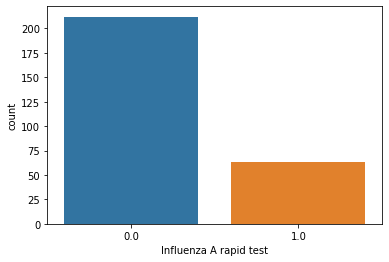

In [29]:
#check the most frequest value in influenza test
sns.countplot(x="Influenza A rapid test", data=df_imputate_blood)

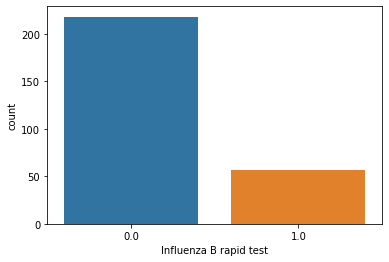

In [30]:
#check the most frequest value in influenza test
sns.countplot(x="Influenza B rapid test", data=df_imputate_blood)

In [31]:
#impute categorical values with most frequently used values
df_imputate_blood['Influenza A rapid test'].fillna('0', inplace=True)
df_imputate_blood['Influenza B rapid test'].fillna('0', inplace=True)

In [32]:
df_imputate_blood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1230 entries, 0 to 1229
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Patient age quantile                       1230 non-null   int64  
 1   SARS-Cov-2 exam result                     1230 non-null   int64  
 2   Proteina C reativa                         1230 non-null   float64
 3   Neutrophils                                1230 non-null   float64
 4   Mean platelet volume                       1230 non-null   float64
 5   Monocytes                                  1230 non-null   float64
 6   Red blood cell distribution width          1230 non-null   float64
 7   Red blood Cells                            1230 non-null   float64
 8   Platelets                                  1230 non-null   float64
 9   Eosinophils                                1230 non-null   float64
 10  Basophils               

In [33]:
df_imputate_blood

,Patient age quantile,SARS-Cov-2 exam result,Proteina C reativa,Neutrophils,Mean platelet volume,Monocytes,Red blood cell distribution width,Red blood Cells,Platelets,Eosinophils,Basophils,Leukocytes,Mean corpuscular hemoglobin,Mean corpuscular volume,Mean corpuscular hemoglobin concentration,Lymphocytes,Hemoglobin,Hematocrit,Influenza B rapid test,Influenza A rapid test
0,9,0,0.119012,0.097528,0.091455,0.347405,-0.127615,0.148437,-0.384146,-0.262662,-0.113378,-0.338022,0.022913,0.011707,0.033161,-0.137305,0.169350,0.173855,1,0
1,16,0,-0.316791,-0.356851,0.010677,1.250496,-0.182790,0.525133,0.135801,-0.624811,0.081693,-0.653951,-0.501356,0.086074,-1.249524,0.173372,0.290940,0.671398,1,0
2,9,0,0.119012,0.097528,0.091455,0.347405,-0.127615,0.148437,-0.384146,-0.262662,-0.113378,-0.338022,0.022913,0.011707,0.033161,-0.137305,0.169350,0.173855,1,0
3,0,0,-0.342622,0.097528,-0.438097,-1.270772,0.613318,0.472242,1.065375,-0.835508,-1.140144,-0.080696,-1.651331,-1.255906,-1.249524,3.764100,-0.460932,-0.152590,1,0
4,10,0,0.119012,0.097528,0.091455,0.347405,-0.127615,0.148437,-0.384146,-0.262662,-0.113378,-0.338022,0.022913,0.011707,0.033161,-0.137305,0.169350,0.173855,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,3,0,0.119012,0.097528,0.091455,0.347405,-0.127615,0.148437,-0.384146,-0.262662,-0.113378,-0.338022,0.022913,0.011707,0.033161,-0.137305,0.169350,0.173855,0,0
1226,13,0,0.119012,0.097528,0.091455,0.347405,-0.127615,0.148437,-0.384146,-0.262662,-0.113378,-0.338022,0.022913,0.011707,0.033161,-0.137305,0.169350,0.173855,0,0
1227,17,0,0.119012,0.097528,0.091455,0.347405,-0.127615,0.148437,-0.384146,-0.262662,-0.113378,-0.338022,0.022913,0.011707,0.033161,-0.137305,0.169350,0.173855,0,0
1228,2,0,0.119012,0.097528,0.091455,0.347405,-0.127615,0.148437,-0.384146,-0.262662,-0.113378,-0.338022,0.022913,0.011707,0.033161,-0.137305,0.169350,0.173855,1,0


In [34]:
#positive rate
df_imputate_blood['SARS-Cov-2 exam result'][df_imputate_blood['SARS-Cov-2 exam result']==1].sum()/df_imputate_blood.shape[0]

0.45365853658536587

### Data split

#### 1st model

In [35]:
# Data split
y = df_small['SARS-Cov-2 exam result']
X = df_small.drop(['SARS-Cov-2 exam result'], axis=1)

In [36]:
X_mat = X.to_numpy()

#### 2nd model

In [37]:
# target/input split
y2 = df_small2['SARS-Cov-2 exam result']
X2 = df_small2.drop(['SARS-Cov-2 exam result'], axis=1)

In [38]:
X2_mat = X2.to_numpy()

#### 3rd model

In [39]:
df_imputate_blood["Influenza B rapid test"] = df_imputate_blood["Influenza B rapid test"].astype(int)
df_imputate_blood["Influenza A rapid test"] = df_imputate_blood["Influenza A rapid test"].astype(int)

In [40]:
y3 = df_imputate_blood['SARS-Cov-2 exam result']
X3 = df_imputate_blood.drop(['SARS-Cov-2 exam result'], axis=1)

In [41]:
X3_mat = X3.to_numpy()

### Data partitioning

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

#### 1st model

In [43]:
# setting random state
rs = 10
# split training data and test data with ratio of 7 : 3.
X_mat = X.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.3, stratify=y, random_state=rs)

#### 2nd model

In [44]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_mat, y2, test_size=0.3, stratify=y2, random_state=rs)

#### 3rd model

In [45]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3_mat, y3, test_size=0.3, stratify=y3,random_state=rs)

# Task 2: Predictive modeling using Decision Tree

## 1. Build a decision tree using the default setting. Answer the followings: 
- a. What is the classification accuracy of training and test datasets? 
- b. What is the size of the tree (number of nodes and rules)?
- c. Which variable is used for the first split?
- d. What are the 5 important variables in building the tree?
- e. What parameters have been used in building the tree? Detail them.

Answers for 2.1) <br>
Model 3 (Inputed one) was the best model among the three models with different data cleansing methods. Therefore, the following questions are answered using model 3.<br>
- a. training = 0.750, test = 0.674 The train accuracy is higher by 0.08 which can mean the model is overfitted.
- b. number of nodes = 119, rules = 59 (number of leaf nodes)
- c. Patient age quantile   
- d. 
    - Patient age quantile
    - Leukocytes
    - Eosinophils
    - Influenza A rapid test
    - Influenza B rapid test 
- e. The parameters used to build the model and their explanations are as follows
    - __ccp_alpha=0.0__ <br>                       no pruning is performed
    - __class_weight=None__ <br>               all classes have the same weight 1
    - __criterion='gini'__<br>                        use Gini index is used as the splitting rule
    - __max_depth=None__<br> 
        Maximum depth of the tree is not specified
    - __max_features=None__<br> 
        Maximum number of features used in each split is not specified
    - __max_leaf_nodes=None__<br> 
        Maximum number of leaf nodes is not specified
    - __min_impurity_decrease=0.0__<br> 
        There is no minimum thresholds value to stop splits
    - __min_impurity_split=None__<br> 
        A node will continue to split if its impurity value is greater the minimum value
    - __min_samples_leaf=1__<br>
        Minimum number of samples required to be at a leaf node is 1
    - __min_samples_split=2__<br>
        Minimum number of samples required to be split an internal node is 2
    - __min_weight_fraction_leaf=0.0__<br> 
        Samples have equal weight to be at a leaf node
    - __presort='deprecated'__<br> 
        This parameter is no longer in use
    - __random_state=10__<br> 
        Keep the same result for each run
    - __splitter='best'__<br>
        Specify the algorithm for finding a split

<hr style="border-top: 1px solid">

#### 2.1) Default setting

#### 1st model

In [46]:
# simple decision tree training
model = DecisionTreeClassifier(random_state=rs)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [47]:
print("Train accuracy:", model.score(X_train, y_train))

Train accuracy: 1.0


In [48]:
print("Test accuracy:", model.score(X_test, y_test))

Test accuracy: 0.6


In [49]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.79      0.73        14
           1       0.25      0.17      0.20         6

    accuracy                           0.60        20
   macro avg       0.47      0.48      0.47        20
weighted avg       0.56      0.60      0.57        20



#### 2nd model

In [50]:
# build the model
model2 = DecisionTreeClassifier(random_state=rs)
model2.fit(X2_train, y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [51]:
#print classification accuracy
print("Train accuracy:", model2.score(X2_train, y2_train))

Train accuracy: 1.0


In [52]:
#print classification accuracy
print("Test accuracy:", model2.score(X2_test, y2_test))

Test accuracy: 0.7704918032786885


In [53]:
y_pred2 = model.predict(X2_test)
print(classification_report(y2_test, y_pred2))

              precision    recall  f1-score   support

           0       0.67      0.81      0.73        36
           1       0.61      0.44      0.51        25

    accuracy                           0.66        61
   macro avg       0.64      0.62      0.62        61
weighted avg       0.65      0.66      0.64        61



#### 3rd model

In [54]:
# build the model
model3 = DecisionTreeClassifier(random_state=rs)
model3.fit(X3_train, y3_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [55]:
#print classification accuracy
print("Train accuracy:", model3.score(X3_train, y3_train))

Train accuracy: 0.7502903600464577


In [56]:
#print classification accuracy
print("Test accuracy:", model3.score(X3_test, y3_test))

Test accuracy: 0.6747967479674797


In [57]:
y_pred3 = model.predict(X3_test)
print(classification_report(y3_test, y_pred3))

              precision    recall  f1-score   support

           0       0.56      0.99      0.71       202
           1       0.77      0.06      0.11       167

    accuracy                           0.57       369
   macro avg       0.66      0.52      0.41       369
weighted avg       0.65      0.57      0.44       369



#### Comparison of three models using ROC curve

Comparison of the three models are performed based on ROC curve

In [58]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_test)
y_pred_proba2 = model2.predict_proba(X2_test)
y_pred_proba3 = model3.predict_proba(X3_test)
roc_index= roc_auc_score(y_test, y_pred_proba[:, 1])
roc_index2 = roc_auc_score(y2_test, y_pred_proba2[:, 1])
roc_index3 = roc_auc_score(y3_test, y_pred_proba3[:, 1])
print("ROC index on test for Model#1:", roc_index)
print("ROC index on test for Model#2:", roc_index2)
print("ROC index on test for Model#3:", roc_index3)

ROC index on test for Model#1: 0.4761904761904762
ROC index on test for Model#2: 0.7627777777777778
ROC index on test for Model#3: 0.7569959091717555


In [59]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y2_test, y_pred_proba2[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y3_test, y_pred_proba3[:,1])

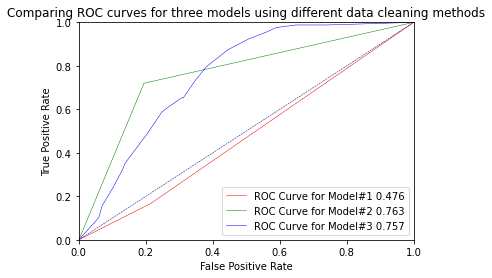

In [60]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC Curve for Model#1 {:.3f}'.format(roc_index), color='red', lw=0.5)
plt.plot(fpr2, tpr2, label='ROC Curve for Model#2 {:.3f}'.format(roc_index2), color='green', lw=0.5)
plt.plot(fpr3, tpr3, label='ROC Curve for Model#3 {:.3f}'.format(roc_index3), color='blue', lw=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing ROC curves for three models using different data cleaning methods')
plt.legend(loc="lower right")
plt.show()

Based on the graph, it is observed that model 2 and model 3 have similar area of curve. In this situation, model 3 is the best model because it shows higer true positive rate.

#### Find out more about model 3

In [61]:
#print the number of nodes in model3
print(model3.tree_.node_count)

119


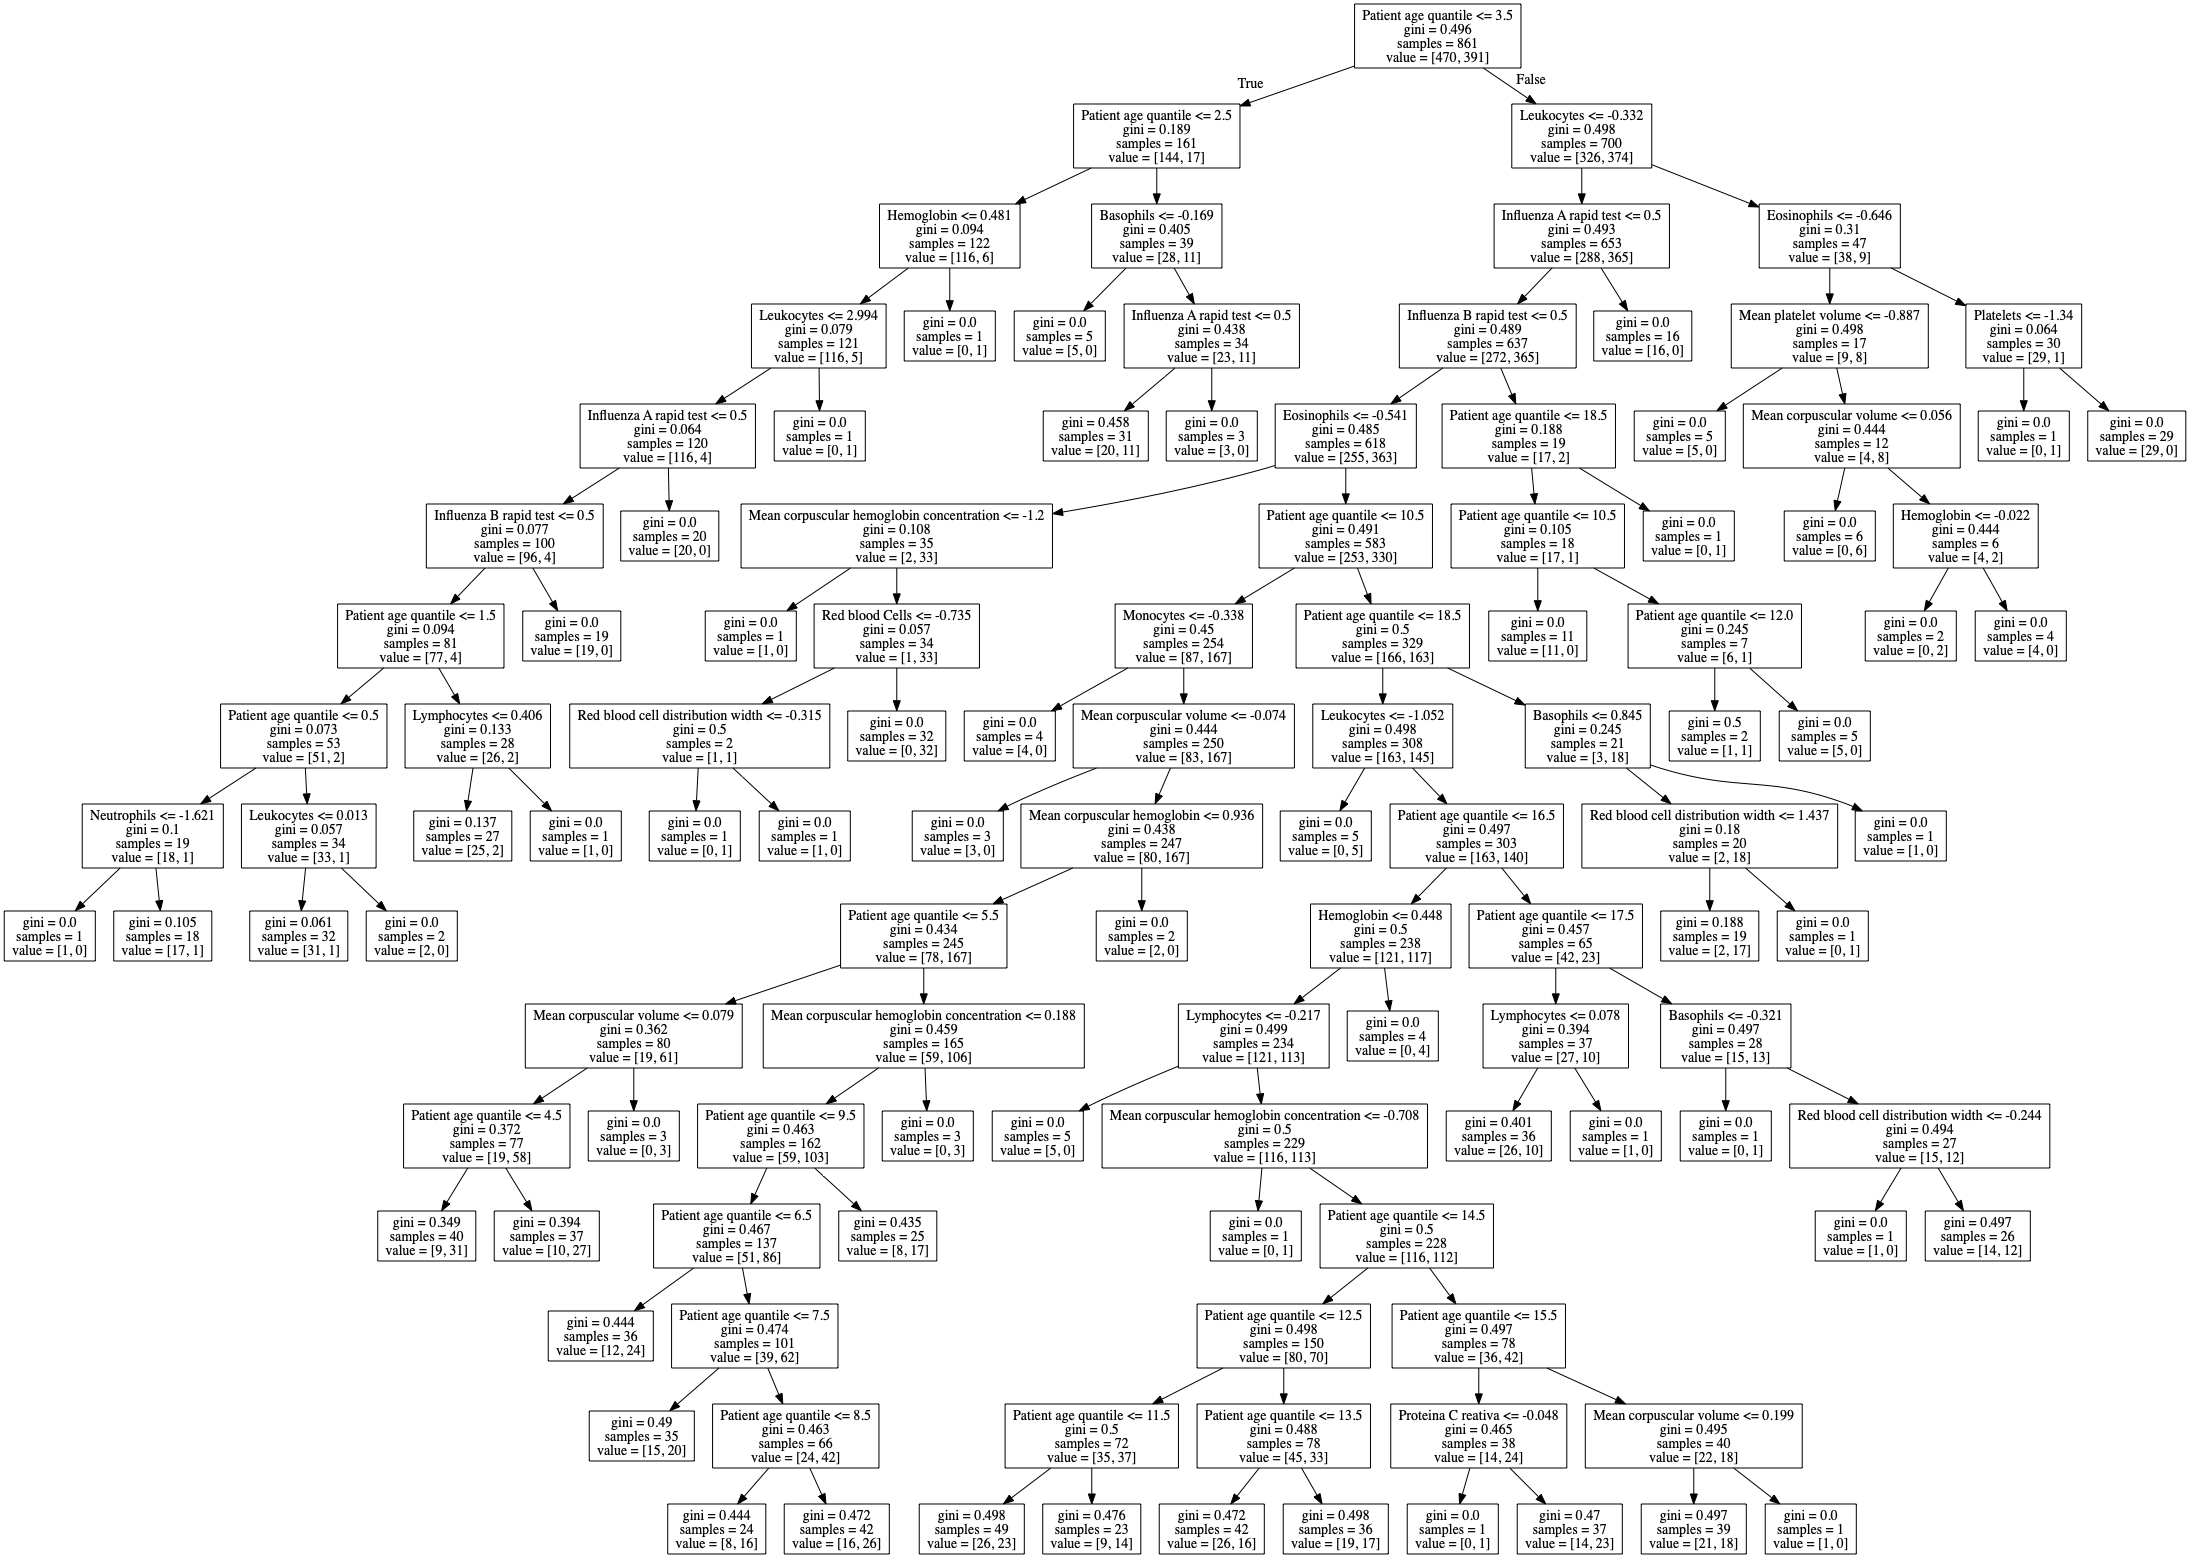

In [62]:
#visualise the desicision tree
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

dotfile = StringIO()
export_graphviz(model3, out_file=dotfile, feature_names=X3.columns)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz_model3.png") 

In [63]:
#print most important features

import numpy as np
# grab feature importances from the model and feature name from the original X
importances = model3.feature_importances_
feature_names = X3.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 10 features, you can leave this out to print out everything
indices = indices[:10]
for i in indices:
 print(feature_names[i], ':', importances[i])

Patient age quantile : 0.4742783646797362
Leukocytes : 0.10324276461214936
Eosinophils : 0.08440296588181198
Influenza A rapid test : 0.06858626726003177
Influenza B rapid test : 0.05394056512348092
Hemoglobin : 0.041140273350390034
Mean corpuscular volume : 0.038336414974462725
Monocytes : 0.021925132305235837
Mean platelet volume : 0.019576850545228234
Mean corpuscular hemoglobin concentration : 0.019513223220155532


## 2. Build another decision tree tuned with GridSearchCV. Answer the followings:
- a. What is the classification accuracy of training and test datasets?
- b. What is the size of the tree (i.e. number of nodes and rules)? Is the size different from the tree in the previous step? Why?
- c. Which variable is used for the first split?
- d. What are the 5 important variables in building the tree? 
- e. Report if you see any evidence of model overfitting.
- f. What are the parameters used? Detail them.

Answers for 2.2)<br>
Model 3 (Inputed one) was the best model among the three models with different data cleansing methods. Therefore, the following questions are answered using model 3.<br>
- a. Train accuracy: 0.704, Test accuracy: 0.686 <br>Compared to the default model, test accuracy has slightly improved by 0.01. On the other hand, test accuracy has decreased by 0.05 and the gap between the two results has become small enough to neglect.    <br>
<br>
- b. number of nodes = 45, rules = 23 (number of leaf nodes) <br>Both numbers are less than a half of the default model. It can be said that the simpler decision tree is better than the default complex tree because overfitting is solved.    <br>
    <br>
- c. Patient age quantile <br>There is no change to this result.    <br>
    <br>
- d. There is no change to this result.
    - Patient age quantile
    - Leukocytes
    - Eosinophils
    - Influenza A rapid test
    - Influenza B rapid test    <br>
        <br>
- e. It appears that there is no significant evidence of overfitting because the difference between train accuracy and test accuracy is comperatively small.      <br>
    <br>
- f. The differences from the default settings are as follows.    <br>
     max_depth= 9, min_samples_leaf= 10, min_samples_split= 2

#### 2.2) Finding optimal hyperparameters with GridSearchCV

In [64]:
from sklearn.model_selection import GridSearchCV

In [65]:
from tqdm import tqdm
from sklearn.metrics import f1_score

Find the best tuning by changing 5 parameters. "criterion", "splitter", "max_depth", "min_samples_split",  "min_samples_leaf" as setting these parameters could reduce the problem of overfitting.

The best combination of parameters is as follows. <br>
'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'best'

In [66]:
%%time
# grid search CV
max_score = 0
SearchMethod = 0
DTC_grid = {DecisionTreeClassifier(): {"criterion": ["gini", "entropy"],
                                       "splitter": ["best", "random"],
                                       "max_depth": [i for i in range(1, 11)],
                                       "min_samples_split": [i for i in range(2, 11)],
                                       "min_samples_leaf": [i for i in range(1, 11)],
                                       "random_state": [i for i in range(10, 11)]
                                      }}
#loop the parameters and find out the one produces the best score for the test dataset
for model, param in tqdm(DTC_grid.items()):
    cv_1 = GridSearchCV(model, param)
    cv_1.fit(X3_train, y3_train)
    pred_y3_2 = cv_1.predict(X3_test)
    score = f1_score(y3_test, pred_y3_2, average="micro")

    if max_score < score:
        max_score = score
        best_param = cv_1.best_params_
        best_model = model.__class__.__name__

print("best score:{}".format(max_score))
print("model:{}".format(best_model))
print("parameter:{}".format(best_param))

100%|██████████| 1/1 [01:38<00:00, 98.82s/it]

best score:0.6856368563685636
model:DecisionTreeClassifier
parameter:{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'best'}
CPU times: user 1min 13s, sys: 1.75 s, total: 1min 14s
Wall time: 1min 38s


According to the scores below, it can be said the problem of overfitting is solved with little difference between two scores. In addition, test accuracy has slightly improved by 0.01 compared to the default model.

In [67]:
print("Train accuracy:", cv_1.score(X3_train, y3_train))

Train accuracy: 0.7049941927990708


In [68]:
print("Test accuracy:", cv_1.score(X3_test, y3_test))

Test accuracy: 0.6856368563685636


In [69]:
#print feature importance

# grab feature importances from the model and feature name from the original X
importances = cv_1.best_estimator_.feature_importances_
feature_names = X3.columns
# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)
# limit to 20 features, you can leave this out to print out everything
indices = indices[:10]
for i in indices:
 print(feature_names[i], ':', importances[i])

Patient age quantile : 0.5807333883425767
Leukocytes : 0.11748642784006517
Eosinophils : 0.11365607528702301
Influenza A rapid test : 0.0870937632957559
Influenza B rapid test : 0.07336281796099932
Proteina C reativa : 0.02235661849444361
Mean platelet volume : 0.004190525283263655
Basophils : 0.0011203834958725665
Lymphocytes : 0.0
Mean corpuscular hemoglobin concentration : 0.0


## 3. What is the difference do you see between these two decision tree models (steps 2.1 & 2.2)?How do they compare performance-wise? Produce the ROC curve for both DTs. Explain why those changes may have happened.

Answers for 2.3) <br>
Regarding the accuracy, train accuracy decreased by 5% but test accuracy improved by 1%.
The improvement of test accuracy was small, however, the complexity of the decision tree was reduced dramatically.
For example, the number of nodes dropped to 45 from 119. The maximum depth dropped 40% from 15 to 9. The number of rules is now 23 compared to 57 of default result.<br>
<br>
The tuned model has slightly larger curve than the default model. This is because the tuned model can classify negative and positive classes better. (The probability of obtaining true positive result is higher)

#### 2.3) Comparison of default and tuned models using ROC curve

In [70]:
y_pred_proba3 = model3.predict_proba(X3_test)
y_pred_proba3_2 = cv_1.predict_proba(X3_test)
roc_index3 = roc_auc_score(y3_test, y_pred_proba3[:, 1])
roc_index3_2 = roc_auc_score(y3_test, y_pred_proba3_2[:, 1])
print("ROC index on test for Default Model:", roc_index3)
print("ROC index on test for Tuned Model:", roc_index3_2)

ROC index on test for Default Model: 0.7569959091717555
ROC index on test for Tuned Model: 0.7791100966384064


In [71]:
fpr3, tpr3, thresholds3 = roc_curve(y3_test, y_pred_proba3[:,1])
fpr3_2, tpr3_2, thresholds3_2 = roc_curve(y3_test, y_pred_proba3_2[:,1])

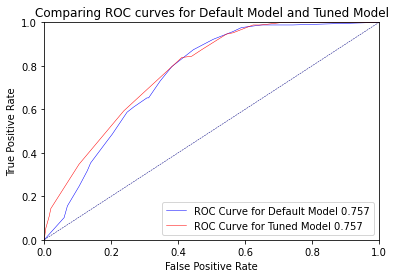

In [72]:
import matplotlib.pyplot as plt
plt.plot(fpr3, tpr3, label='ROC Curve for Default Model {:.3f}'.format(roc_index3), color='blue', lw=0.5)
plt.plot(fpr3_2, tpr3_2, label='ROC Curve for Tuned Model {:.3f}'.format(roc_index3), color='red', lw=0.5)
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing ROC curves for Default Model and Tuned Model')
plt.legend(loc="lower right")
plt.show()

According to the ROC curve above, tuned model is the best one because it has a larger curve. 

## 4. From the better model, can you identify which patients could potentially be "COVID-19 Positive"?
Can you provide general characteristics of those patients?

Answers for 2.4) <br>
    There are four types of combinations that could cause COVID-19 positive according to the visualised decision tree.<br>
    Generally, patient age quantile must be greater than 3.5 and both influenza tests are negative. Additionally, Leukocytes is -0.332 or less.<br>
    <br>

Patient age quantile > 3.5 & <br>
Leukocytes <= -0.332 &<br>
Influenza A rapid test = negative &<br>
Influenza B rapid test = negative &<br>
Eosinophils <=- 0.541<br>
<br>
Patient age quantile > 3.5 & <br>
Leukocytes <= -0.332 &<br>
Influenza A rapid test = negative &<br>
Influenza B rapid test = negative &<br>
Eosinophils > - 0.541 &<br>
Patient age quantile <= 10.5 &<br>
Protenia C reativa > -0.142<br>
<br>
Patient age quantile > 18.5 & <br>
Leukocytes <= -0.332 &<br>
Influenza A rapid test = negative &<br>
Influenza B rapid test = negative &<br>
Eosinophils > - 0.541 &<br>
<br>
Patient age quantile > 10.5 & <br>
Patient age quantile <= 15.5 &<br>
Leukocytes <= -0.607 &<br>
Influenza A rapid test = negative &<br>
Influenza B rapid test = negative &<br>
Eosinophils > - 0.541 <br>

#### 2.4) Visualise the decision tree for the best model

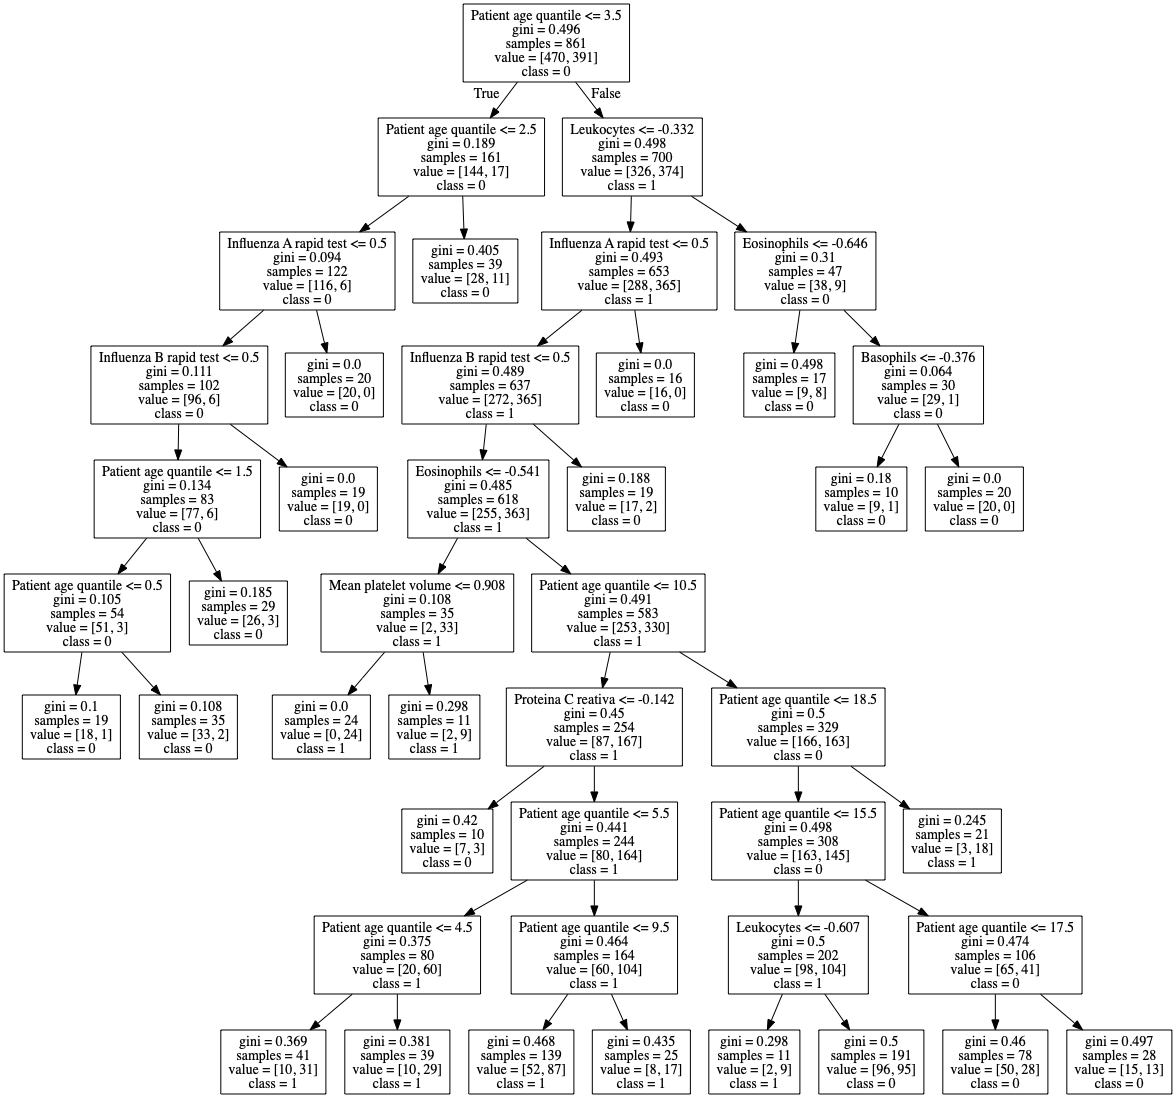

In [73]:
# visualize
dotfile = StringIO()
export_graphviz(cv_1.best_estimator_, out_file=dotfile, feature_names=X3.columns, class_names=['0','1'])
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dt_viz_model3_tuned.png")

# Task 3: Predictive modeling using Regression

## 1. Build a regression model using the default regression method with all inputs. Build another model tuned with GridSearchCV. Choose a better model to answer the followings:
- a. Explain why did you choose that model?
- b. Name the regression function used.
- c. Did you apply standardization of variables? Why would you normalise the variables for regression mining?
- d. Report on which variables are included in the regression model. 
- e. Report the top-5 important variables (in the order) in the model. 
- f. What is classification accuracy on training and test datasets?
- g. Report any sign of overfitting.

Answers for 3.1)
- a. The default model is selected; however, there is little difference between the model and the model with GridSearchCV because the optimal C value is the same (C = 10). The reason that C value for both models was the same could be due to the nature that test accuracy of the model is higher than training accuracy. In other words, C value is used to solve overfitting, but there is no sign of overfitting with the default model.
- b. We use logistic regression function because it is suitable for predicting a categorical classification in this case. 
- c. Yes, it is necessary to perform standardization because it makes difficult to compare data points when they have different scales.
- d. All input variables are included in this model
- e.  The following variables are 5 most important variables. In the decision tree, Age was the most important one followed by Leukocytes, Eosinophils and Influenza test A and B. However, age is not considered as important in regression model.
    Influenza A rapid test
    Influenza B rapid test
    Eosinophils
    Neutrophils
    Leukocytes
- f. Train accuracy: 0.594, Test accuracy: 0.615
- g. Test accuracy is greater than train accuracy, which means there is no overfitting. However, it could be underfitting because both rates are very low. This could be caused by noise or error of the subset of data. 

#### Extra data preprocessing for this specific model (Standardisation)

In [74]:
#perform standardisation on  our input variables
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.model_selection import GridSearchCV 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print("Before scaling\n-------------") 
for i in range(19):    
    col = X3_train[:,i]    
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".          
          format(i, min(col), max(col), np.mean(col), np.std(col)))
X3_train_std = scaler.fit_transform(X3_train, y3_train)
print ("After scaling\n-------------") 
for i in range(19):    
    col = X3_train_std[:,i]    
    print("Variable #{}: min {}, max {}, mean {:.2f} and std dev {:.2f}".         
        format(i, min(col), max(col), np.mean(col), np.std(col)))
X3_test_std = scaler.transform(X3_test)

Before scaling
-------------
Variable #0: min 0.0, max 19.0, mean 9.59 and std dev 5.63
Variable #1: min -0.5333752039999999, max 5.9462704660000005, mean 0.13 and std dev 0.40
Variable #2: min -3.3397746089999996, max 2.0524332519999997, mean 0.10 and std dev 0.38
Variable #3: min -1.896609068, max 2.7033133510000003, mean 0.10 and std dev 0.40
Variable #4: min -2.058668613, max 3.6404480930000003, mean 0.35 and std dev 0.45
Variable #5: min -1.33272469, max 4.947685719, mean -0.13 and std dev 0.33
Variable #6: min -1.907856226, max 2.975752592, mean 0.14 and std dev 0.38
Variable #7: min -2.0625154969999997, max 1.756274581, mean -0.39 and std dev 0.30
Variable #8: min -0.8355076909999999, max 6.91813755, mean -0.27 and std dev 0.36
Variable #9: min -1.140143752, max 3.1362831589999995, mean -0.12 and std dev 0.34
Variable #10: min -1.658539414, max 3.609285593, mean -0.34 and std dev 0.34
Variable #11: min -5.519430161, max 1.903137684, mean 0.03 and std dev 0.40
Variable #12: min -

#### 3.1) Build the default model and another with GridSearch tuning

#### Default DLRmodel

In [75]:
#DLRmodel
#define the default logistic regression model
from sklearn.linear_model import LogisticRegression

DLRmodel = LogisticRegression(random_state=rs)
DLRmodel.fit(X3_train_std,y3_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
# training and test accuracy 
print("Train accuracy:", DLRmodel.score(X3_train_std, y3_train)) 
print("Test accuracy:", DLRmodel.score(X3_test_std, y3_test))
# classification report on test data 
y_pred_3 = DLRmodel.predict(X3_test_std) 
print(classification_report(y3_test, y_pred_3))

Train accuracy: 0.59465737514518
Test accuracy: 0.6151761517615176
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       202
           1       0.58      0.52      0.55       167

    accuracy                           0.62       369
   macro avg       0.61      0.61      0.61       369
weighted avg       0.61      0.62      0.61       369



In [77]:
# grab feature importances from the model and feature name from the original X 
coef = DLRmodel.coef_[0] 
feature_names = X.columns
# sort them out in descending order
indices = np.argsort(np.absolute(coef)) 
indices = np.flip(indices, axis=0)
# limit to 5 features, 
indices = indices[:5]
for i in indices:   
    print(feature_names[i], ':', coef[i])

Influenza A rapid test : -1.1088224689914947
Influenza B rapid test : -0.7169429604259034
Eosinophils : -0.6230553224529928
Neutrophils : -0.4980606680696757
Leukocytes : -0.42397710388821347


#### DLRmodel with Grid Search

In [78]:
# grid search CV, setting parameters
DLRparams = {'C': [pow(10, x) for x in range(-6, 4)]}
# use all cores to tune logistic regression with C parameter 
DLRcv = GridSearchCV(param_grid = DLRparams,estimator=LogisticRegression(random_state=rs), return_train_score= True, cv=10, n_jobs = -1)
DLRcv.fit(X3_train_std, y3_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=10, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [79]:
print(DLRcv.best_params_)

{'C': 10}


In [80]:
print("Train accuracy:", DLRcv.score(X3_train_std, y3_train))
print("Test accuracy:", DLRcv.score(X3_test_std, y3_test))

Train accuracy: 0.5934959349593496
Test accuracy: 0.6178861788617886


In [81]:
coef = DLRcv.best_estimator_.coef_[0]
feature_names = X.columns

#limit to 5 features while in descending order.
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', coef[i])

Red blood Cells : 1.7456443526097203
Influenza A rapid test : -1.5513924010221165
Hematocrit : -0.8579969079487235
Influenza B rapid test : -0.7656721281890078
Hemoglobin : -0.7098936360224325


In [82]:
result_set = DLRcv.cv_results_
print(result_set)

{'mean_fit_time': array([0.0232161 , 0.02936575, 0.01358328, 0.01208611, 0.02747238,
       0.03039181, 0.03416469, 0.05949512, 0.08513618, 0.10933609]), 'std_fit_time': array([0.00993193, 0.0153786 , 0.00526272, 0.00296172, 0.02266331,
       0.01641717, 0.01243268, 0.01397619, 0.02840341, 0.03302464]), 'mean_score_time': array([0.00120056, 0.00153606, 0.00295398, 0.00111909, 0.00088656,
       0.00528035, 0.00241714, 0.00084958, 0.00090339, 0.00166082]), 'std_score_time': array([0.00075003, 0.00128183, 0.00349194, 0.00071638, 0.00018024,
       0.00652952, 0.00468357, 0.00010797, 0.0001625 , 0.00097085]), 'param_C': masked_array(data=[1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,
                   1000],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 1e-06}, {'C': 1e-05}, {'C': 0.0001}, {'C': 0.001}, {'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}, {'C'

Total number of models:  10


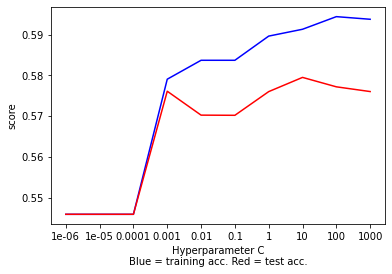

In [83]:
import matplotlib.pyplot as plt
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))
# plot Hyperparameter C values vs training and test accuracy score
plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)),  test_result, 'r')
plt.xlabel('Hyperparameter C\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),[pow(10, x) for x in range(-6, 4)])
plt.ylabel('score')
plt.show()

## 2. Build another regression model on the reduced variables set. Perform dimensionality reduction with Recursive feature elimination. Tune the model with GridSearchCV to find the best parameter setting. Answer the followings:
- a. Was dimensionality reduction useful to identify a good feature set for building the accurate model?
- b. What is classification accuracy on training and test datasets?
- c. Report any sign of overfitting.
- d. Report the top-5 important variables (in the order) in the model.

Answers for 3.2)
- a. The dimensionality reduction was not useful because despite the number of features was reduced from 19 to 11, it did not contribute to any significant change in the model accuracy.
- b. Train accuracy: 0.596, Test accuracy: 0.615 Both train and test accuracy did not produce acceptable accuracy scores.
- c. There is no sign of overfitting
- d. The most important variables are completely different from the default model and model used developed using decision tree method.
    Leukocytes
    Basophils
    Red blood cell distribution width 
    Proteina C reativa
    Eosinophils

#### 3.2) Build another regression model on the reduced variables set

In [84]:
#DLRmodel-RFE

from sklearn.feature_selection import RFECV
rfe = RFECV(estimator = LogisticRegression(random_state=rs), cv=10) 
rfe.fit(X3_train_std, y3_train) 

# comparing how many variables before and after 
print("Original feature set", X3_train_std.shape[1]) 
print("Number of features after elimination", rfe.n_features_)

Original feature set 19
Number of features after elimination 11


In [85]:
X3_train_sel = rfe.transform(X3_train_std) 
X3_test_sel = rfe.transform(X3_test_std)

In [86]:
# grid search CV 
params = {'C': [pow(10, x) for x in range(-6, 4)]}
rfe_cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
rfe_cv.fit(X3_train_sel, y3_train)
# test the best model 
print("Train accuracy:", rfe_cv.score(X3_train_sel, y3_train)) 
print("Test accuracy:", rfe_cv.score(X3_test_sel, y3_test))
y_pred_3_2 = rfe_cv.predict(X3_test_sel) 
print(classification_report(y3_test, y_pred_3_2))
# print parameters of the best model 
print(rfe_cv.best_params_)


Train accuracy: 0.5969802555168409
Test accuracy: 0.6151761517615176
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       202
           1       0.58      0.52      0.55       167

    accuracy                           0.62       369
   macro avg       0.61      0.61      0.61       369
weighted avg       0.61      0.62      0.61       369

{'C': 10}


In [87]:
coef = rfe_cv.best_estimator_.coef_[0]
feature_names = X.columns

#limit to 5 features while in descending order.
indices = np.argsort(np.absolute(coef))
indices = np.flip(indices, axis=0)

indices = indices[:5]

for i in indices:
    print(feature_names[i], ':', coef[i])

Leukocytes : -1.5213178654018737
Basophils : -0.7353921987189831
Red blood cell distribution width : -0.6334773766010574
Proteina C reativa : -0.5627271508944909
Eosinophils : -0.4393250393108395


## 3. Produce the ROC curve for all different regression models. Using the best regression model, can you identify which patients could potentially be "COVID-19 Positive"? Can you provide general characteristics of those patients?

Answers for 3.3) <br>
It is impossible to tell which model is the best as the three models show almost identical trajectory.
Regarding the characteristics of positive patients, using the coefficients from the default model, the following characteristics can be assumed.
- Red blood Cells: the higher the value is, it is more likely for a patient to be COVID-19 positive.
- Influenza A rapid test: If it's negative, it is more likely for a patient to be COVID-19 positive.
- Hematocrit :  the lower the value is, it is more likely for a patient to be COVID-19 positive.
- Influenza B rapid test: If it's negative, it is more likely for a patient to be COVID-19 positive.
- Hemoglobin: the lower the value is, it is more likely for a patient to be COVID-19 positive.
<br>

__original coefficient value__ <br>
Red blood Cells : 1.7456443526097203 <br>
Influenza A rapid test : -1.5513924010221165 <br>
Hematocrit : -0.8579969079487235 <br>
Influenza B rapid test : -0.7656721281890078 <br>
Hemoglobin : -0.7098936360224325 <br>

#### 3.3) Create ROC curves for different models

In [88]:
#comparing three models
from sklearn.metrics import roc_auc_score
y_pred_proba_lr = DLRmodel.predict_proba(X3_test_std) 
y_pred_proba_lr_cv = DLRcv.predict_proba(X3_test_std) 
y_pred_proba_rfe_cv = rfe_cv.predict_proba(X3_test_sel) 

roc_index_lr = roc_auc_score(y3_test, y_pred_proba_lr[:, 1])
roc_index_lr_cv = roc_auc_score(y3_test, y_pred_proba_lr_cv[:, 1]) 
roc_index_rfe_cv = roc_auc_score(y3_test, y_pred_proba_rfe_cv[:, 1]) 

print("ROC index on test for `DLRmodel`:", roc_index_lr) 
print("ROC index on test for `cv`:", roc_index_lr_cv) 
print("ROC index on test for `rfe_cv`:", roc_index_rfe_cv) 

ROC index on test for `DLRmodel`: 0.7202525641785735
ROC index on test for `cv`: 0.7204304262761606
ROC index on test for `rfe_cv`: 0.7189482421296022


In [89]:
from sklearn.metrics import roc_curve

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y3_test, y_pred_proba_lr[:, 1]) 
fpr_lr_cv, tpr_lr_cv, thresholds_lr_cv = roc_curve(y3_test, y_pred_proba_lr_cv[:, 1]) 
fpr_rfe_cv, tpr_rfe_cv, thresholds_rfe_cv = roc_curve(y3_test, y_pred_proba_rfe_cv[:, 1])

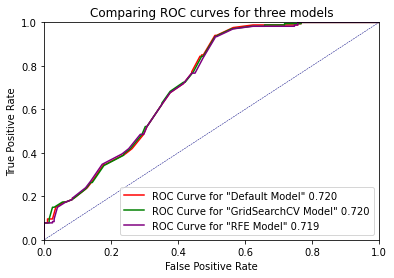

In [90]:
import matplotlib.pyplot as plt

plt.plot(fpr_lr, tpr_lr, label='ROC Curve for "Default Model" {:.3f}'.format(roc_index_lr), color='red')
plt.plot(fpr_lr_cv, tpr_lr_cv, label='ROC Curve for "GridSearchCV Model" {:.3f}'.format(roc_index_lr_cv), color ='green' )
plt.plot(fpr_rfe_cv, tpr_rfe_cv, label='ROC Curve for "RFE Model" {:.3f}'.format(roc_index_rfe_cv),color ='purple')

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Comparing ROC curves for three models') 
plt.legend(loc="lower right") 
plt.show()

# Task 4: Predictive modeling using Neural Networks

## 1. Build a Neural Network model using the default setting. Answer the following:
   - a. Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.
   - b. What is classification accuracy on training and test datasets?
   - c. Did the training process converge and resulted in the best model?

Answers for 4.1)
   - a. The following parameter settings are used in the default model except for the random state parameter which is defined for reproductivity of the model.
       - __activation='relu'__ use ReLU as the activation function (The mathematical function in between the input which is fed into the hidden layer and the output going to the next layer)
       - __alpha=0.0001__ refers to the sum squares of every feature weights which could prevent overfitting by penalising too complex models
       - __batch_size='auto'__ Automatically decides  how many samples will be propagated via the neural network
       - __beta_1=0.9__　coefficient β1 for adam equation is 0.9
       - __beta_2=0.99__ coefficient β2 for adam equation is 0.99
       - __early_stopping=False__ no early stopping for training
       - __epsilon=1e-08__ represents numerical stability when using adam
       - __hidden_layer_sizes=(100,)__ The number of neurons in a layer is set to 100
       - __learning_rate='constant'__ learning rate for weight update is constatnt (0.001)
       - __learning_rate_init=0.001__ initial learining rate for weight update
       - __max_fun=15000__ not in use when solver = adam
       - __max_iter=200__ max number of iteration for learining is 200
       - __momentum=0.9__ not in use when solver = adam
       - __n_iter_no_change=10, tol=0.0001__  if the optimisation score is not improved by 0.001 for 10 iterations, the training stops 
       - __nesterovs_momentum=True__ not in use when solver = adam
       - __power_t=0.5__ the speed for reducing learning_rate
       - __random_state=10__ random state
       - __shuffle=True suffle__ samples in each iteration
       - __solver='adam__ the solver for weight optimisation is adam (beneficial for large datasets with thousands of samples)
       - __validation_fraction=0.1__ 10% of training dataset is saved for validation
       - __verbose=False__  do not print out progress message
       - __warm_start=False__  do not use the solution of the previous call

- b. The neural network is reported to have approximately 71.4% training accuracy but the accuray when testing dropped to 66.1%.
- c. The train process did not converge although the number of maximum iterations was reached ,the warning message appeared. The number of maximum iterations was set to 200 to avoid comsuming too much computational resources.

### 4.1) default model

In this particular task, the model called 'Multi-layer Perceptron Classifier' is being used. This is because the model is suitable for supervised learning problems which is corresponding to our case where the COVID-19 results of the patients are representing labels. The training process of the model involves with adjusting parameters referring to weights or biases of the inputs.

In [91]:
# import a neural network model

from sklearn.neural_network import MLPClassifier

In [92]:
# train the model with the default parameters

model_4_1 = MLPClassifier(random_state=rs)
model_4_1.fit(X3_train, y3_train)
print("Train accuracy:", model_4_1.score(X3_train, y3_train))
print("Test accuracy:", model_4_1.score(X3_test, y3_test))
y_pred_4_1 = model_4_1.predict(X3_test)
print(classification_report(y3_test, y_pred_4_1))
print(model_4_1)

Train accuracy: 0.7142857142857143
Test accuracy: 0.6612466124661247
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       202
           1       0.62      0.63      0.63       167

    accuracy                           0.66       369
   macro avg       0.66      0.66      0.66       369
weighted avg       0.66      0.66      0.66       369

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=10, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


/Users/ShinnoOh/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [93]:
# see how many input parameters

print(X3_train.shape)

(861, 19)


## 2. Refine this network by tuning it with GridSearchCV. Report the trained model.
   - a. Explain the parameters used in building this model, e.g., network architecture, iterations, activation function, etc.
   - b. What is classification accuracy on training and test datasets?
   - c. Did the training process converge and resulted in the best model? Doyou see any sign of over-fitting?

Answers for 4.2)
   - a. The number of hidden layer sizes was 19 which was resulted from a trial and error process and the rest of model parameters were default values except for the random state which was the same as defined the previous question. 
   - b. It is reported to roughly have training accuracy of 67% and test accuracy of 68%.
   - c. The train process did not converge although the maximum iterations of 200 were reached. Furthermore, due to a trivial difference of the training and test accuracy, there is no sign of over-fitting with the tuned model.

### 4.2) Finding optimal hyperparameters with GridSearchCV

Next, the model is tuned with two parameters 'hidden layer size' and 'alpha'. Generally, hidden layer size between the the number of output neurons (1) and the number of variables (19) is sufficient. Regarding alpha, it is worth investigating because the term counteracts with overfitting. Due to the computing resource limitations, firstly, the optimal number of 'hidden layer size' is examined. Then, it is combined with alpha parameter to find the best combination.

In [94]:
# tune the model with a single layer composing of 1 to 19 neurons with increment step of 2
params = {'hidden_layer_sizes': [(x,) for x in range(1, 20, 2)]}

cv_3 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs),return_train_score=True, cv=10, n_jobs=-1)
cv_3.fit(X3_train, y3_train)

/Users/ShinnoOh/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=10, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state=10, shuffle=True,
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'h

In [95]:
result_set = cv_3.cv_results_
print(result_set)

{'mean_fit_time': array([1.53096752, 1.3120506 , 1.02946498, 1.01718297, 1.03273661,
       1.06949918, 1.12564893, 1.08825836, 1.09672201, 1.08015599]), 'std_fit_time': array([0.19038146, 0.39341802, 0.05816115, 0.02323965, 0.03954978,
       0.0209326 , 0.03380181, 0.03485717, 0.04041794, 0.12386412]), 'mean_score_time': array([0.00472257, 0.00240028, 0.00147591, 0.00126591, 0.00222039,
       0.00120564, 0.00143368, 0.0013231 , 0.00245273, 0.00232167]), 'std_score_time': array([0.00461779, 0.00229656, 0.00045906, 0.0001945 , 0.00158476,
       0.00028819, 0.00061426, 0.00045803, 0.00301099, 0.00223488]), 'param_hidden_layer_sizes': masked_array(data=[(1,), (3,), (5,), (7,), (9,), (11,), (13,), (15,),
                   (17,), (19,)],
             mask=[False, False, False, False, False, False, False, False,
                   False, False],
       fill_value='?',
            dtype=object), 'params': [{'hidden_layer_sizes': (1,)}, {'hidden_layer_sizes': (3,)}, {'hidden_layer_sizes': 

Plotting hidden layers hyperparameter values vs training and test accuracy score of split 0.

Total number of models:  10


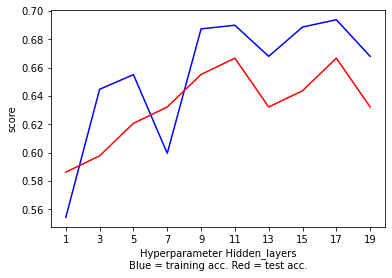

In [96]:
import matplotlib.pyplot as plt

train_result = result_set['split0_train_score']
test_result = result_set['split0_test_score']
print("Total number of models: ", len(test_result))

plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(1, 20,2))
plt.ylabel('score')
plt.show()

Since the result had multiple splits, it is a agood idea to find to averages of train and test scores to help determining the optimum number of hidden lay sizes

Total number of models:  10


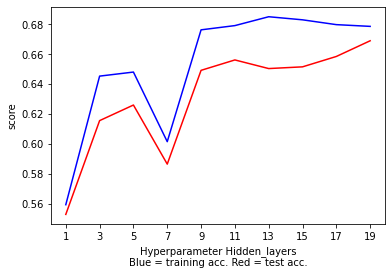

In [97]:
train_result = result_set['mean_train_score']
test_result = result_set['mean_test_score']
print("Total number of models: ", len(test_result))

plt.plot(range(0, len(train_result)), train_result, 'b', range(0,len(test_result)), test_result, 'r')
plt.xlabel('Hyperparameter Hidden_layers\nBlue = training acc. Red = test acc.')
plt.xticks(range(0, len(train_result)),range(1, 20, 2))
plt.ylabel('score')
plt.show()

In [98]:
print("Train accuracy:", cv_3.score(X3_train, y3_train))
print("Test accuracy:", cv_3.score(X3_test, y3_test))

y_pred_4_2 = cv_3.predict(X3_test)
print(classification_report(y3_test, y_pred_4_2))

print(cv_3.best_params_)

Train accuracy: 0.670150987224158
Test accuracy: 0.6802168021680217
              precision    recall  f1-score   support

           0       0.81      0.54      0.65       202
           1       0.61      0.84      0.70       167

    accuracy                           0.68       369
   macro avg       0.71      0.69      0.68       369
weighted avg       0.72      0.68      0.68       369

{'hidden_layer_sizes': (19,)}


According to the chart of hidden layers hyperparameter values vs mean training and mean test accuracy scores, the best number of hidden layer sizes is 19. Once the number of hidden layer sizes is obtained,  we furthur experiment with the other hyperparameter, <a href ="https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html">Alpha</a>. 

In [99]:
params = {'hidden_layer_sizes': [(19,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv_3_2 = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_3_2.fit(X3_train, y3_train)

print("Train accuracy:", cv_3_2.score(X3_train, y3_train))
print("Test accuracy:", cv_3_2.score(X3_test, y3_test))

y_pred_4_3 = cv_3_2.predict(X3_test)
print(classification_report(y3_test, y_pred_4_3))

print(cv_3_2.best_params_)

Train accuracy: 0.670150987224158
Test accuracy: 0.6802168021680217
              precision    recall  f1-score   support

           0       0.81      0.54      0.65       202
           1       0.61      0.84      0.70       167

    accuracy                           0.68       369
   macro avg       0.71      0.69      0.68       369
weighted avg       0.72      0.68      0.68       369

{'alpha': 0.0001, 'hidden_layer_sizes': (19,)}


/Users/ShinnoOh/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


From the report, it can be seen that the best alpha value is similar to the default value which reinforces the fact that there is no sign of overfitting in the model due to a small difference of training and test accuracy. 

## 3. Would feature selection help in improving the model? Build another Neural Network model with reduced features set. Perform dimensionality reduction by selecting variables with the decision tree (use the best model from Task 2). Tune the model with GridSearchCV to find the best parameters setting. Answer the following:
   - a. Did feature selection favor the outcome? Any change in network architecture? What inputs are being used as the network input? 
   - b. What is classification accuracy on training and test datasets?
   - c. How many iterations are now needed to train this network?
   - d. Do you see any sign of over-fitting? Did the training process converge and resulted in the best model?

Answers for 4.3)
  - a. The feature selection does not improve the accuracy of the neural network. The hidden layer sizes have been reduced from 19 to 2. The inputs of the network are Patient age quantile, Leukocytes, Eosinophils, Influenza A rapid test, and Influenza B rapid test.
  - b. It is reported that the model approximately has training accuracy of 61.8% and test accuracy of 60.2%.
  - c. 200 iterations were carried out.
  - d. It seems that there is no sign of over-fitting. The optimization hasn't converged yet and the training process did not result in the best model.

### 4.3) Feature selection

In order to avoid overloaing input parameters into the model which sometimes there are some parameters add little value to a prediction yet cost computational resources, it is worth considering dimesion reduction technique.

In [100]:
# retrieve the hyperparameters of a decision tree model from the task2

print(cv_1.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 10, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'best'}


In [101]:
    # grab feature importances from the model
    importances = cv_1.best_estimator_.feature_importances_
    
    # sort them out in descending order
    indices = np.argsort(importances)
    indices = np.flip(indices, axis=0)

    # limit to 20 features, you can leave this out to print out everything
    indices = indices[:20]

    for i in indices:
        print(feature_names[i], ':', importances[i])

Patient age quantile : 0.5807333883425767
Leukocytes : 0.11748642784006517
Eosinophils : 0.11365607528702301
Influenza A rapid test : 0.0870937632957559
Influenza B rapid test : 0.07336281796099932
Proteina C reativa : 0.02235661849444361
Mean platelet volume : 0.004190525283263655
Basophils : 0.0011203834958725665
Lymphocytes : 0.0
Mean corpuscular hemoglobin concentration : 0.0
Mean corpuscular volume : 0.0
Mean corpuscular hemoglobin : 0.0
Hemoglobin : 0.0
Hematocrit : 0.0
Platelets : 0.0
Red blood Cells : 0.0
Red blood cell distribution width : 0.0
Monocytes : 0.0
Neutrophils : 0.0


In [102]:
# see the shape of a subset training data set from important feature selection

from sklearn.feature_selection import SelectFromModel
selectmodel = SelectFromModel(cv_1.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X3_train)
X_test_sel_model = selectmodel.transform(X3_test)
print(X_train_sel_model.shape)

(861, 5)


The number of important features is 5 thus we will conduct a trial and error by creating a single hidden layer composing of 1 to 5 neurons (this is because the number of neurons should not exceed the number of input features) as well as define the alpha of 0.0001 which we found that it was the optimal value from previous question.

In [103]:
params = {'hidden_layer_sizes': [(1,),(2,),(3,),(4,),(5,)], 'alpha': [0.0001]}

cv_sel_model = GridSearchCV(param_grid=params, estimator=MLPClassifier(random_state=rs), cv=10, n_jobs=-1)
cv_sel_model.fit(X_train_sel_model, y3_train)

print("Train accuracy:", cv_sel_model.score(X_train_sel_model, y3_train))
print("Test accuracy:", cv_sel_model.score(X_test_sel_model, y3_test))

y_pred = cv_sel_model.predict(X_test_sel_model)
print(classification_report(y3_test, y_pred))

print(cv_sel_model.best_params_)

Train accuracy: 0.6178861788617886
Test accuracy: 0.6016260162601627
              precision    recall  f1-score   support

           0       0.65      0.60      0.62       202
           1       0.55      0.60      0.58       167

    accuracy                           0.60       369
   macro avg       0.60      0.60      0.60       369
weighted avg       0.61      0.60      0.60       369

{'alpha': 0.0001, 'hidden_layer_sizes': (2,)}


/Users/ShinnoOh/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


It is reported that the best number of hidden layer sizes is 2 with approximately 61.8% and 60.2% of training and test accuaracy, repectively.

## 4. Produce the ROC curve for all different NNs. Using the best neural network model, which patients could potentially be " COVID-19 Positive"? Can you provide general characteristics of those patients? Is it easy to comprehend the performance of a neural network model for decision making?

Answer for 4.4)
- The best neural network model is the refined model with tuned parameters from GridSearchCV. Nevetheless, due to the black box nature of neural networks, general characteristics of potential COVID-19 positive patients cannot be provided. Hence, this makes a neural network is challenging in terms of low explainability in decision making process. In addition to this, explainable artificial intelligence is a growing field in data science community thus in the future it might worth investigating interpretability of classifying models by <a href = "https://arxiv.org/abs/1602.04938">LIME</a> which is a novel proposed technique of explaining any classifier.  

### 4.4) Comparison of three models using ROC curve

In [104]:
from sklearn.metrics import roc_auc_score

y_pred_proba_nn_0 = model_4_1.predict_proba(X3_test)
y_pred_proba_nn_1 = cv_3_2.predict_proba(X3_test)
y_pred_proba_nn_2 = cv_sel_model.predict_proba(X_test_sel_model)

roc_index_nn_0 = roc_auc_score(y3_test, y_pred_proba_nn_0[:, 1])
roc_index_nn_1 = roc_auc_score(y3_test, y_pred_proba_nn_1[:, 1])
roc_index_nn_2 = roc_auc_score(y3_test, y_pred_proba_nn_2[:, 1])

print("ROC index on test for NN_default:", roc_index_nn_0)
print("ROC index on test for NN_tuned:", roc_index_nn_1)
print("ROC index on test for NN_dt:", roc_index_nn_2)

ROC index on test for NN_default: 0.7388984407422777
ROC index on test for NN_tuned: 0.7592043635501274
ROC index on test for NN_dt: 0.6755795340013043


In [105]:
from sklearn.metrics import roc_curve

fpr_nn_0, tpr_nn_0, thresholds_nn_0 = roc_curve(y3_test, y_pred_proba_nn_0[:,1])
fpr_nn_1, tpr_nn_1, thresholds_nn_1 = roc_curve(y3_test, y_pred_proba_nn_1[:,1])
fpr_nn_2, tpr_nn_2, thresholds_nn_2 = roc_curve(y3_test, y_pred_proba_nn_2[:,1])

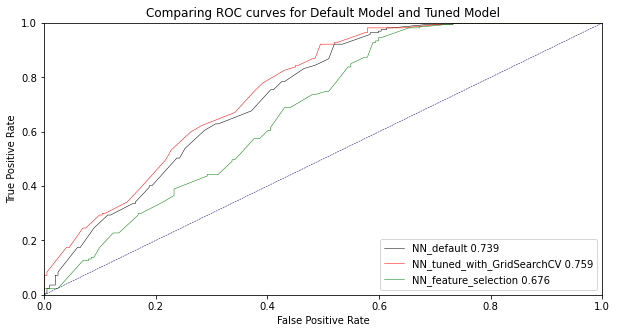

In [106]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(fpr_nn_0, tpr_nn_0, label='NN_default {:.3f}'.format(roc_index_nn_0), color='black', lw=0.5)
plt.plot(fpr_nn_1, tpr_nn_1, label='NN_tuned_with_GridSearchCV {:.3f}'.format(roc_index_nn_1), color='red', lw=0.5)
plt.plot(fpr_nn_2, tpr_nn_2, label='NN_feature_selection {:.3f}'.format(roc_index_nn_2), color='green', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing ROC curves for Default Model and Tuned Model')
plt.legend(loc="lower right")
plt.show()

It apprears that the best model is the neural network with tuned parameter with GridSearchCV since its curve has higher true positive rate than the rest as well as its highest ROC score.

## Task 5: Final remarks: Decision making (2 marks)

### 5.1) Finally, based on all models and analysis, is there a model you will use in decision making? Justify your choice. Draw a ROC chart and Accuracy Table to support your findings.

Answer for 5.1) 
- According to the graph and the comparison table, the model which can be used in decision making is the Decision tree model with hyperparameters tuning from GridSearchCV. This is because the model not only has the closest to the top left corner ROC curve, and it also has the highest train and test accuracy.   

<table style="width:600px; float:left;">
    <thead>
        <td><h3>Model</h3></td>
        <td><h3>Train Accuracy</h3></td>
        <td><h3>Test Accuracy</h3></td>
    </thead>
    <tr>
        <td>Decision Tree (tuned with GridSearchCV)</td>
        <td>0.70499419279907</td>
        <td>0.6856368563685636</td>
     </tr>   
     <tr>
        <td>Logistic Regression (default)</td>
          <td>0.59465737514518</td>
        <td>0.6151761517615176</td>
     </tr> 
     <tr>
        <td>Neural Network (tuned with GridSearchCV)</td>
           <td>0.67015098722416</td>
        <td>0.6802168021680217</td>
     </tr> 
</table>

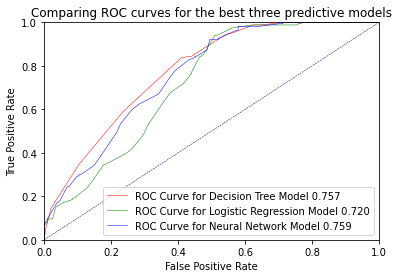

In [107]:
plt.plot(fpr3_2, tpr3_2, label='ROC Curve for Decision Tree Model {:.3f}'.format(roc_index3), color='red', lw=0.5)
plt.plot(fpr_lr, tpr_lr, label='ROC Curve for Logistic Regression Model {:.3f}'.format(roc_index_lr), color='green',lw=0.5)
plt.plot(fpr_nn_1, tpr_nn_1, label='ROC Curve for Neural Network Model {:.3f}'.format(roc_index_nn_1), color='blue', lw=0.5)

plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparing ROC curves for the best three predictive models')
plt.legend(loc="lower right")
plt.show()

### 5.2) Can you summarise the positives and negatives of each predictive modelling method based on this analysis?

Answer for 5.2)

<table style="width:800px; float:left;">
    <thead>
        <td style="text-align: center;"><h3>Model</h3></td>
        <td style="text-align: center;"><h3>Positive</h3></td>
        <td style="text-align: center;"><h3>Negative</h3></td>
    </thead>
    <tr>
        <td style="text-align: center; vertical-align: center;">Decision Tree</td>
        <td><p>It is highly interpretable so that the general characteristics of COVID-19 positive patients can be derived. It is also easy to visualise the model's rules.</p></td>
        <td><p>The model consumes expensive computational resources when there are many input parameters.</p></td>
     </tr>   
     <tr>
        <td style="text-align: center; vertical-align: center;">Logistic Regression</td>
          <td><p>This model was the simplest to implement as well as the ease of interpretability from its coefficients.</p></td>
        <td><p>It was the most difficult model to enhance the accuracy because depite different various model improving techniques, the accuracy remained almost the same.</p></td>
     </tr> 
     <tr>
        <td style="text-align: center; vertical-align: center;">Neural Network</td>
           <td><p>The model is able to handle with complex problems since the model complexity can be simply increased from adding the number of layers and neurons.</p></td>
        <td><p>Its low interpretability makes the model unable to provide the general characteristics of COVID-19 positive patients. Moreover, it required relatively high computational resources.</p></td>
     </tr> 
</table>